In [ ]:
## NN from scratch

import pandas as pd

data = pd.read_csv("/Users/balmukundmishra/Desktop/2025-Learning/ML-Course/7_Tensor_and_PyTorch/heart_attack_prediction_dataset.csv")

In [1]:
## NN from scratch

import pandas as pd

data = pd.read_csv("/Users/balmukundmishra/Desktop/2025-Learning/ML-Course/7_Tensor_and_PyTorch/heart_attack_prediction_dataset.csv")

In [2]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [13]:
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [14]:
missing_value = data.isnull().sum()
print(missing_value)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [15]:
## Handling missing values

for col in data.columns:
    if data[col].isnull().any():
        if data[col].dtype in ['int64', 'float64']:
            data[col].fillna(df[col].median(), inplace=True)
        else:
            data[col].fillna(df[col].mode()[0], inplace=True)

In [18]:
## Convert collumns if required
# Convert appropriate columns if necessary (e.g., categorical variables to category type)
categorical_columns = ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].astype('category')

In [16]:
print(data['Sex'].astype('category'))

0         Male
1         Male
2       Female
3         Male
4         Male
         ...  
8758      Male
8759    Female
8760      Male
8761      Male
8762    Female
Name: Sex, Length: 8763, dtype: category
Categories (2, object): ['Female', 'Male']


In [19]:
display(data.describe())

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [20]:
numeric_columns = [col for col in data.columns if col not in categorical_columns]

In [21]:
numeric_columns

['Age',
 'Cholesterol',
 'Heart Rate',
 'Diabetes',
 'Family History',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Exercise Hours Per Week',
 'Previous Heart Problems',
 'Medication Use',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'Heart Attack Risk']

ValueError: num must be an integer with 1 <= num <= 6, not 7

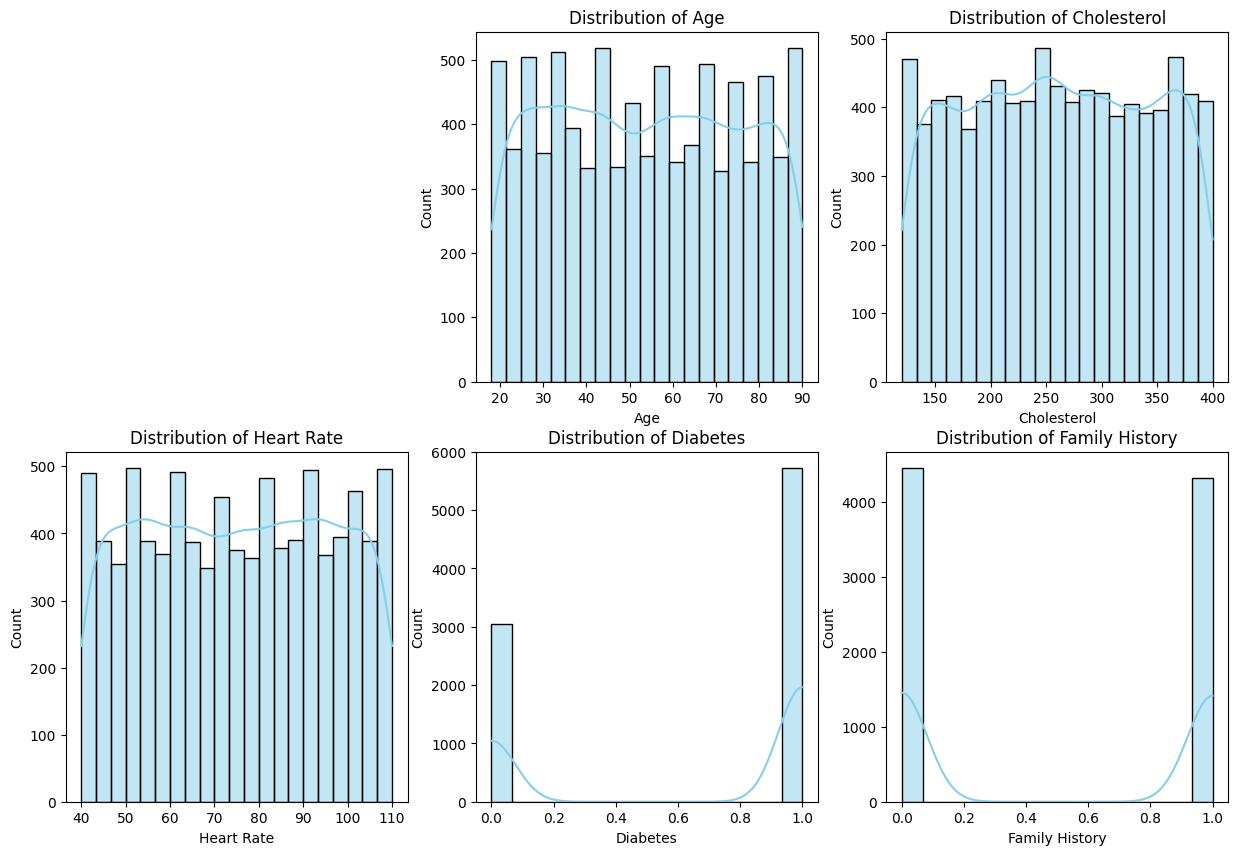

In [31]:
from matplotlib import pyplot as plt 
import seaborn as sns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_columns, 1):
    #print(col)
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

In [17]:
print(data['Patient ID'].astype('category'))

0       BMW7812
1       CZE1114
2       BNI9906
3       JLN3497
4       GFO8847
         ...   
8758    MSV9918
8759    QSV6764
8760    XKA5925
8761    EPE6801
8762    ZWN9666
Name: Patient ID, Length: 8763, dtype: category
Categories (8763, object): ['AAA9246', 'AAC3641', 'AAD0466', 'AAD3011', ..., 'ZZQ4895', 'ZZT7113', 'ZZU2948', 'ZZY4724']


In [5]:
data['Heart Attack Risk']

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

In [6]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [9]:
import numpy as np
x = np.array(data.loc[:,data.columns != 'Heart Attack Risk'])
y = np.array(data['Heart Attack Risk'])

In [10]:
x

array([['BMW7812', 67, 'Male', ..., 'Argentina', 'South America',
        'Southern Hemisphere'],
       ['CZE1114', 21, 'Male', ..., 'Canada', 'North America',
        'Northern Hemisphere'],
       ['BNI9906', 21, 'Female', ..., 'France', 'Europe',
        'Northern Hemisphere'],
       ...,
       ['XKA5925', 47, 'Male', ..., 'Brazil', 'South America',
        'Southern Hemisphere'],
       ['EPE6801', 36, 'Male', ..., 'Brazil', 'South America',
        'Southern Hemisphere'],
       ['ZWN9666', 25, 'Female', ..., 'United Kingdom', 'Europe',
        'Northern Hemisphere']], dtype=object)